### Transfer Model Tryout

#### Import

In [1]:
from keras.models import load_model
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import re
from keras.preprocessing.image import img_to_array

# Load the model
# model = load_model("/Users/leonpawelzik/code/ay-ei/08-Project-Week/photopocalypse/models/blurr_model.h5")
# path = "/Users/leonpawelzik/code/ay-ei/08-Project-Week/photopocalypse/models/blurry.jpeg"


#### Preprocessing

In [ ]:
# Preprocessing
image_rgb = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
image_rgb = cv2.resize(image_rgb, dsize=(600, 600))
image_rgb = np.expand_dims(image_rgb, axis=0)


#### Prediction

In [ ]:
# Prediction
prediction = model.predict(image_rgb)


In [ ]:
prediction


In [ ]:
# sn[i][0]> sn[i][1]:
if prediction[0][0] > prediction[0][1]:
    classification = "blurry"
else:
    classification = "not blurry"


#### Print

In [ ]:
classification


In [ ]:

sn = model.predict(np.array(vision_features))
sn
blurs = sharps = 0
for i in range(sn.shape[0]):
    if sn[i][0]> sn[i][1]:
        blurs += 1
    else:
        sharps += 1

print(f"sharps: {sharps}, blurs: {blurs}")


### Model 2 - Image Enhancements

*Import*

In [2]:
model = load_model("/Users/leonpawelzik/code/ay-ei/08-Project-Week/photopocalypse/photopocalypse/models/EDSR_blur_dataset_model_2.h5")


1/1 [==============================] - 2s 2s/step


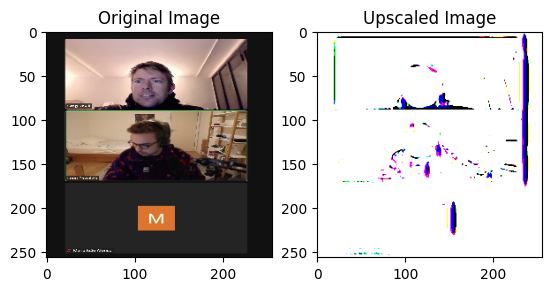

In [3]:
import cv2
import matplotlib.pyplot as plt

image_path = "/Users/leonpawelzik/code/ay-ei/08-Project-Week/photopocalypse/raw_data/Screenshot 2023-12-04 at 17.34.07.png"
image = cv2.imread(image_path)

# Resize the image
image = cv2.resize(image, (256, 256))
image = np.expand_dims(image, axis=0)
upscaled_image = model.predict(image)

# Display the original and upscaled images
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image.squeeze(), cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(upscaled_image.squeeze(), cv2.COLOR_BGR2RGB))
plt.title('Upscaled Image')

plt.show()


In [24]:
# to get the files in proper order
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)
# defining the size of the image
SIZE = 256
high_img = []
path = '/Users/leonpawelzik/code/ay-ei/08-Project-Week/photopocalypse/raw_data/BTS-Schleifen-CloseUp-6.jpg'

# to get the files in proper order
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)

# open cv reads images in BGR format so we have to convert it to RGB
img = cv2.imread(path, 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# # # resizing image
img = cv2.resize(img, (SIZE, SIZE))
img = img.astype('float32') / 255.0
img = img_to_array(img)


In [19]:
validation_low_image = np.reshape(img,(SIZE,SIZE,3))

In [20]:
predicted = np.clip(model.predict(validation_low_image.reshape(1,SIZE, SIZE,3)),0.0,1.0).reshape(SIZE, SIZE,3)

1/1 [==============================] - 2s 2s/step


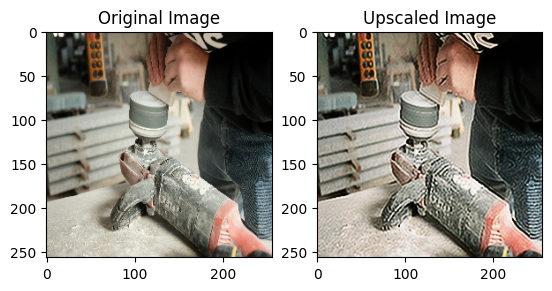

In [21]:
# Display the original and upscaled images
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(predicted)
plt.title('Upscaled Image')

plt.show()

In [29]:
# Convert the normalized pixel values to 8-bit (0-255)
from numpy import int32

output_img = cv2.cvtColor(predicted * 255, cv2.COLOR_RGB2BGR).astype(np.uint8)
output_img = cv2.resize(output_img, (3000, 2000))
# Save the image
cv2.imwrite('upscaled_image.png', output_img)

True